In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
bank= pd.read_csv('bank-full.csv',sep=';')

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# Assign outcome as 0 if income <=50K and as 1 if income >50K
bank['y'] = [0 if x == 'no' else 1 for x in bank['y']]
# Assign X as a DataFrame of features and y as a Series of the outcome variable
# axis : {0 or ‘index’, 1 or ‘columns’}, default 0
# Whether to drop labels from the index (0 or ‘index’) or columns (1 or‘columns’).


In [5]:
category_features = bank.select_dtypes(include=['object', 'bool']).columns.values
for col in category_features:
    print(col, "(", len(bank[col].unique()) , "values):\n", np.sort(bank[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 3 values):
 ['divorced' 'married' 'single']
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default ( 2 values):
 ['no' 'yes']
housing ( 2 values):
 ['no' 'yes']
loan ( 2 values):
 ['no' 'yes']
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown']


In [6]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [8]:
for col in category_features:
    print(f"\033[1m\033[94m{col} \n{20 * '-'}\033[0m")
    print(bank[col].value_counts(), "\n")
print("\033[1m\033[94m unique values \033[0m"'\n',bank.nunique())

job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
--------------------
no     44396
yes      815
Name: default, dtype: int64 

housing 
--------------------
yes    25130
no     20081
Name: housing, dtype: int64 

loan 
--------------------
no     37967
yes     7244
Name: loan, dtype: int64 

contact 
--------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month 
--------------------
may    13766
jul     6895
aug    

# -Data Visualization and Analysis

1) Visualize feature correlations

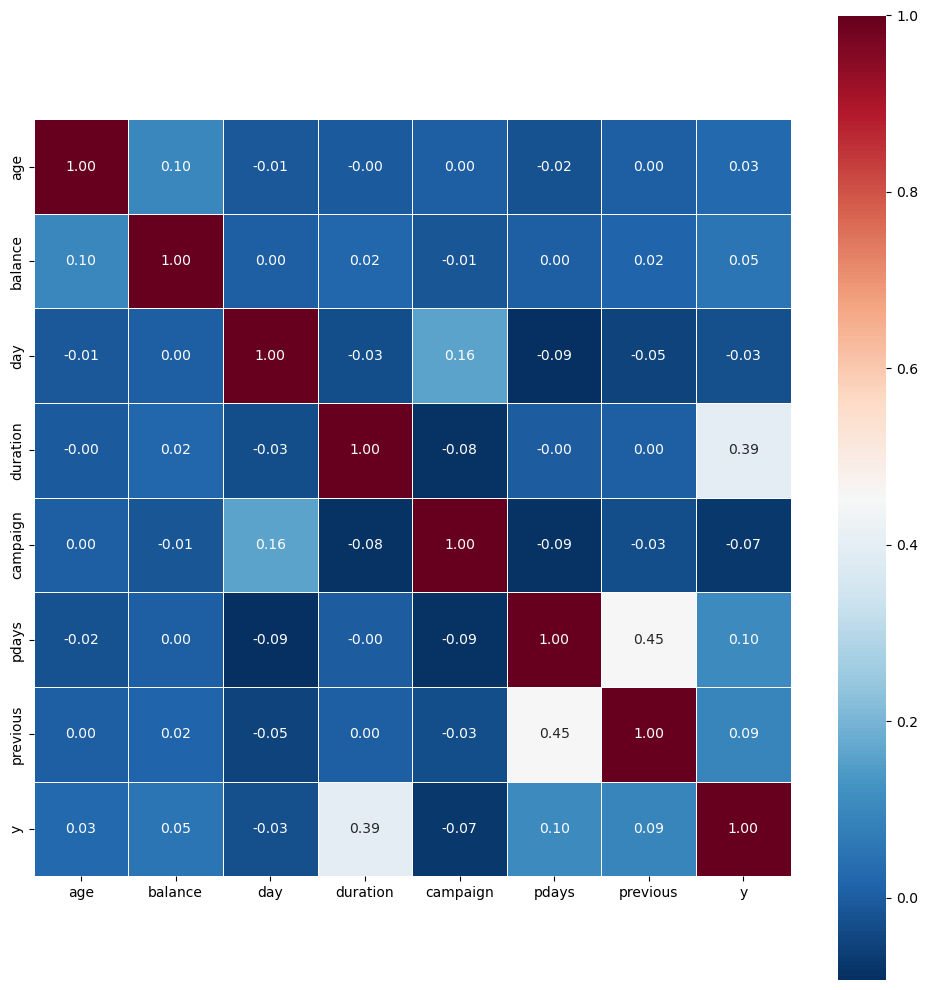

In [9]:
#here we get a code to convert the categorical to numeric
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(bank._get_numeric_data().astype(float).corr(),
square=True, cmap='RdBu_r', linewidths=.5,
annot=True, fmt='.2f').figure.tight_layout()
plt.show()

 2) To get a feel for the type of data we are dealing with, we visualize distributions of numerical features with histograms

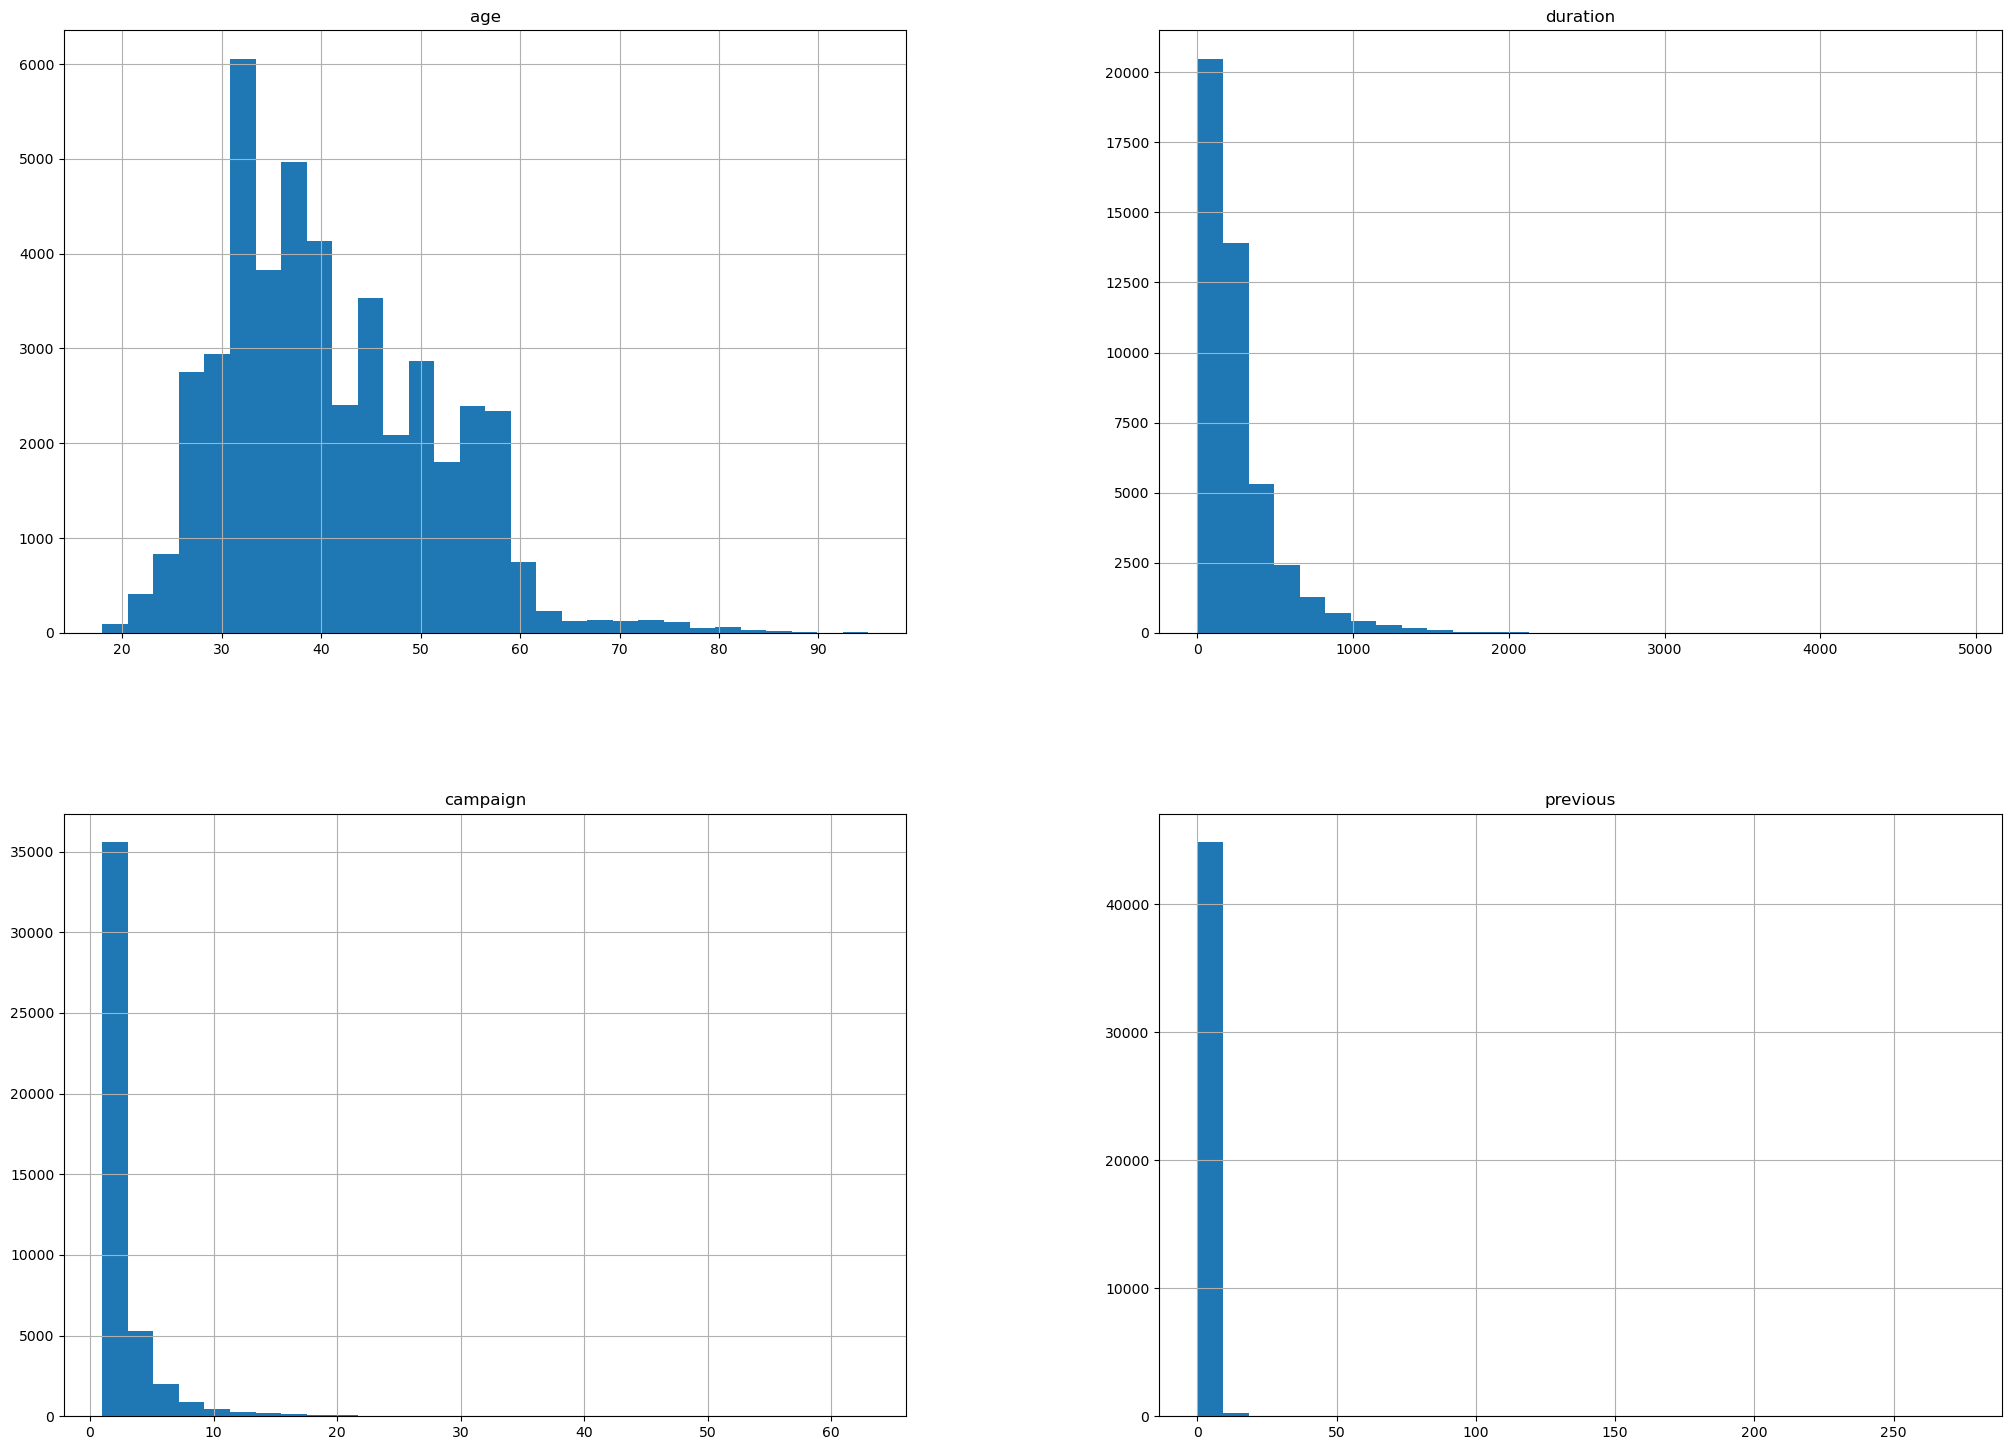

In [10]:
%matplotlib inline
bank[['age','duration','campaign','previous']].hist(bins=30, figsize=(25,18));

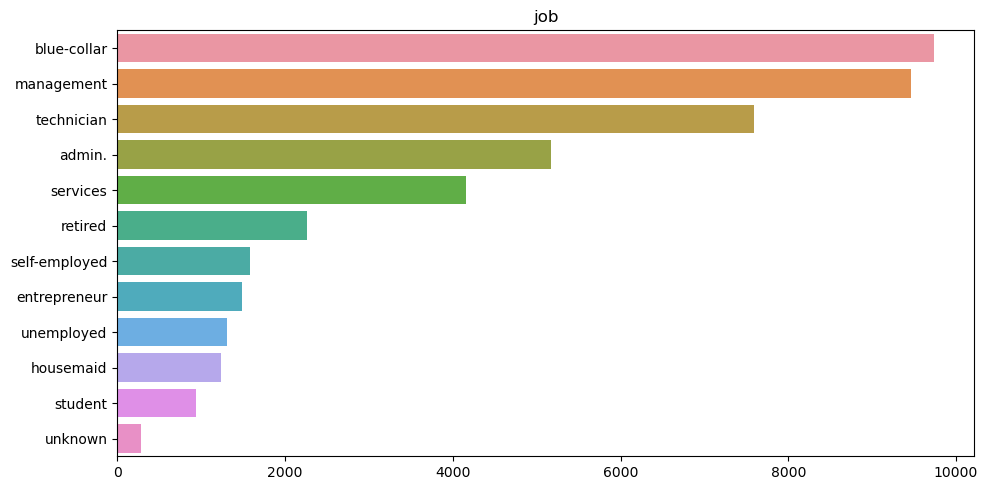

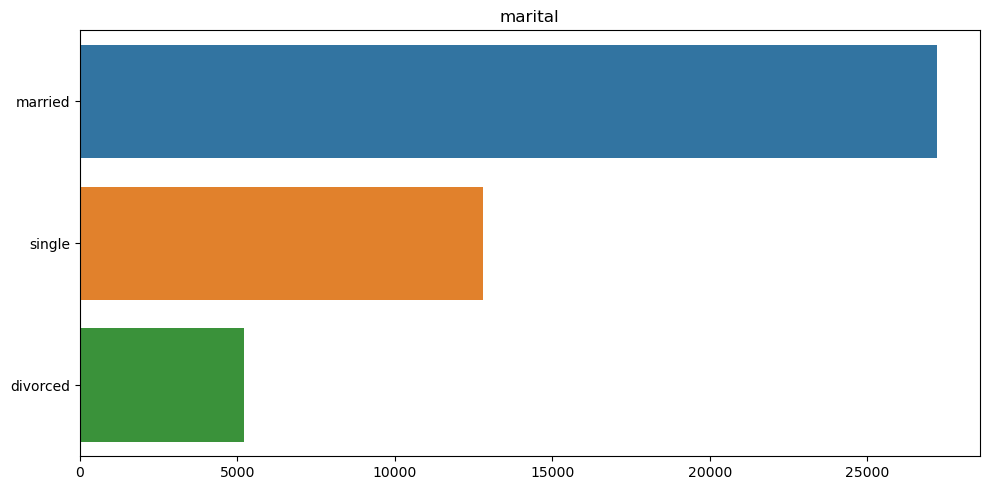

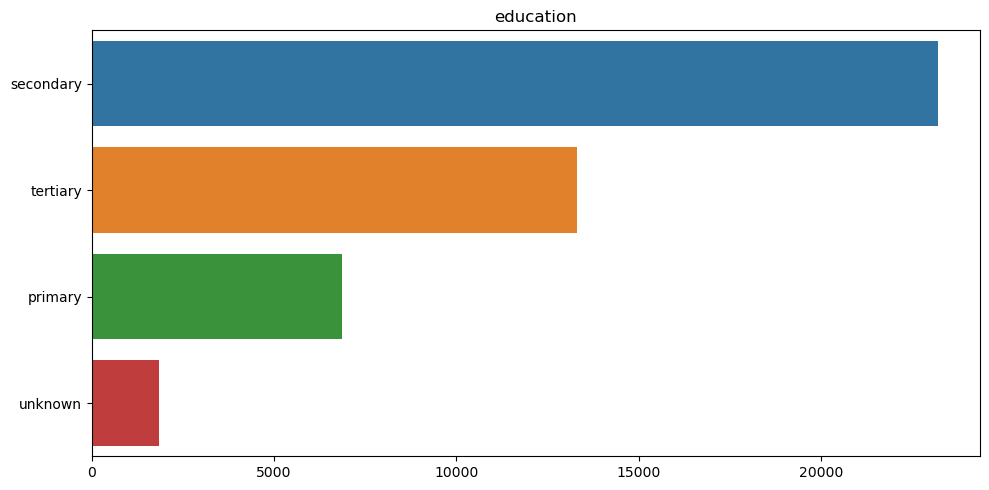

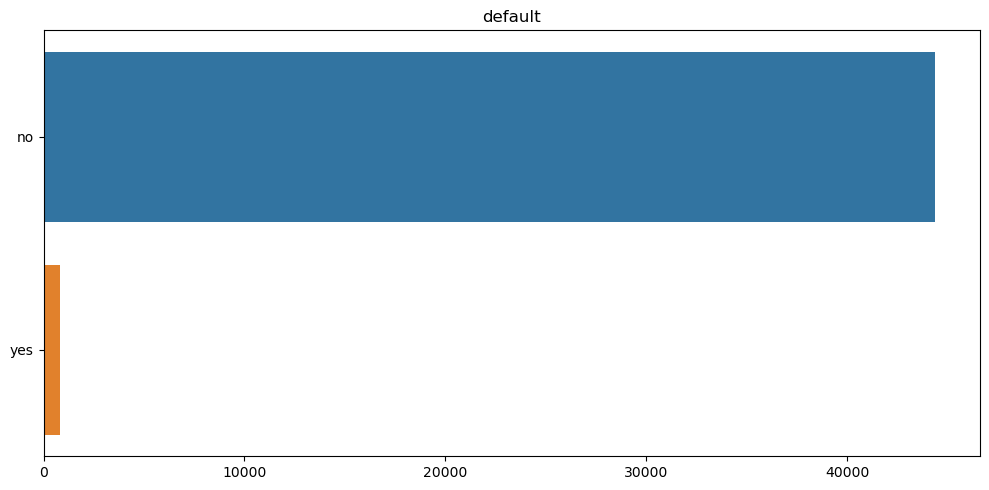

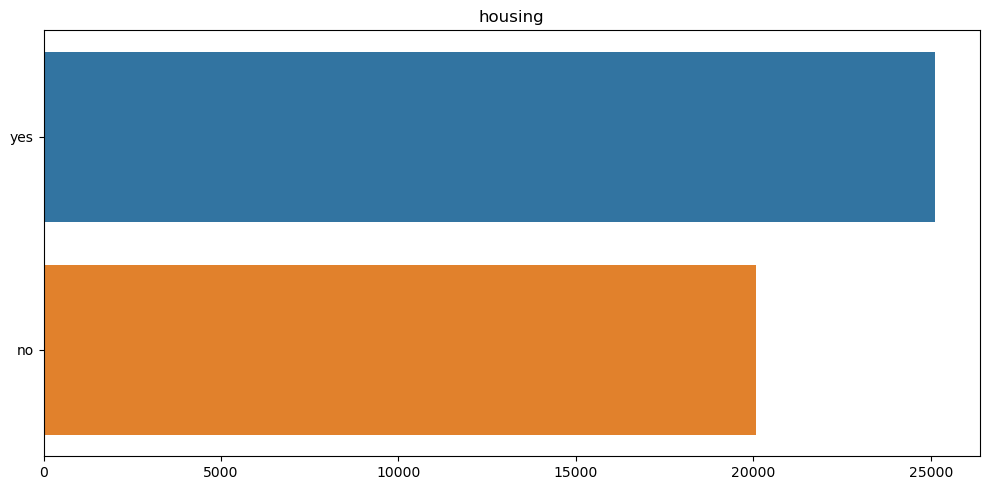

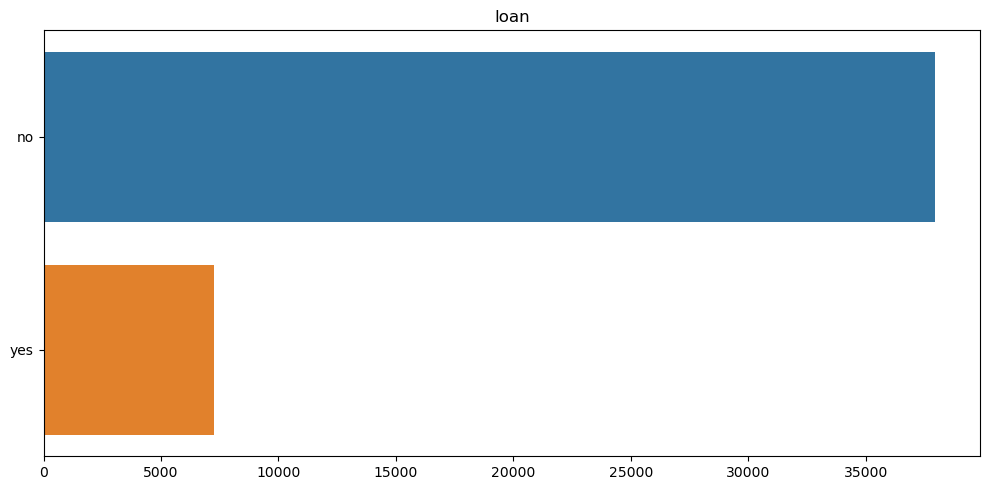

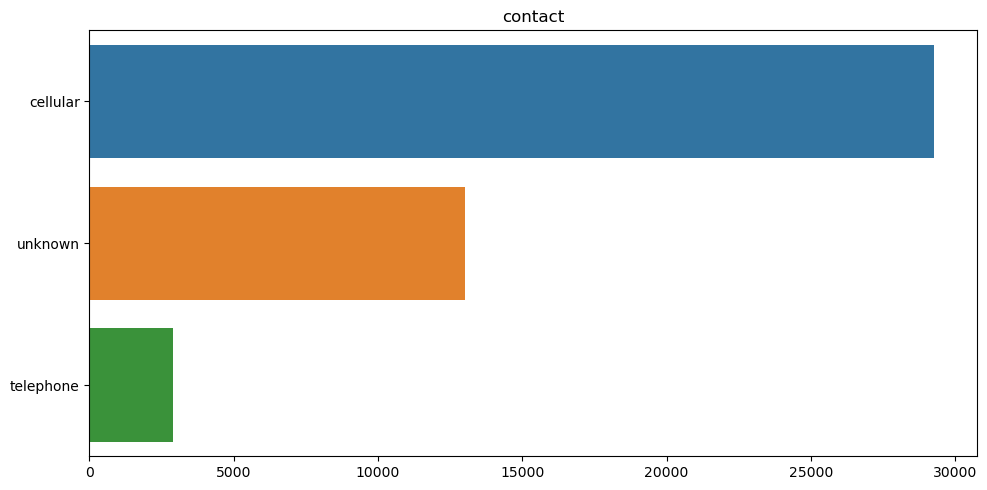

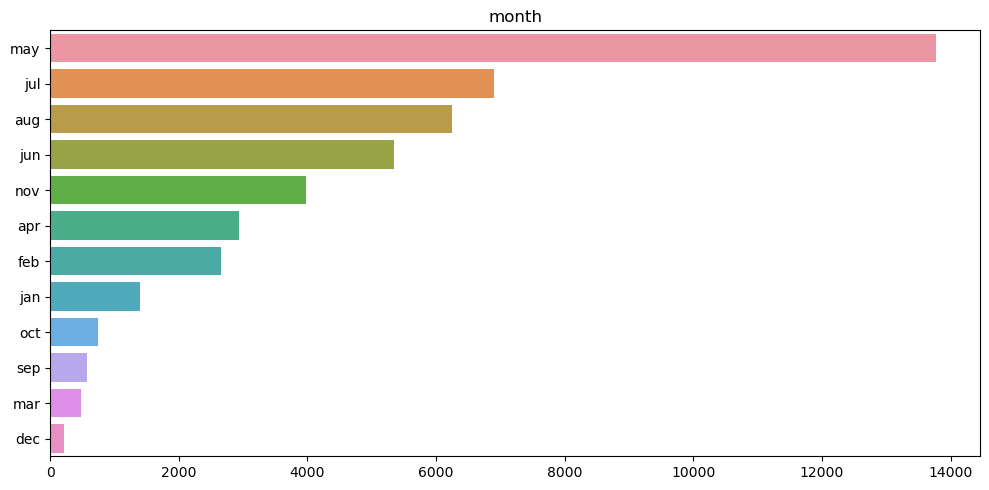

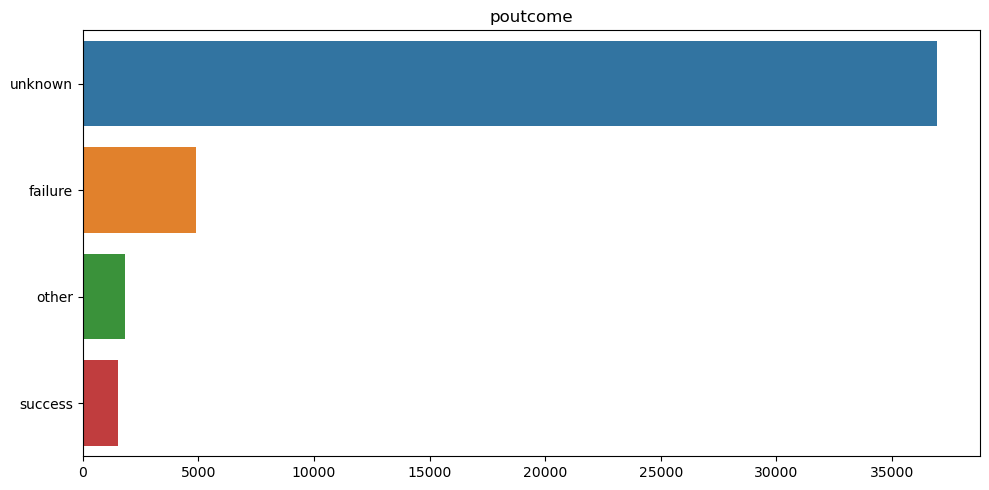

In [11]:
import warnings
warnings.filterwarnings('ignore')

for col in category_features:
    plt.figure(figsize=(10,5))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index, data=bank)
    plt.title(col)
    plt.tight_layout();

# ————————-Insights————————-

Our observations:- Job: The audiences of these campaigns target mostly administrators, bluecollars, and technicians.
Marital status: Most of them are married; married clients are twice as single people.
Education: Most clients have university education level while illiterate people are very less.
default/credit: Most people have no default stay on their credit file.
housing: Most people have no housing loan.
loan: Most people have no personal loan.
contact: Common means of communication are cellular.
month - May is the busy month and December is the least busy month (because of the holidays
season).
day of week: Thursday is the most busy day while Friday is the least busy day of the week.

# Pie chart on Subscription to the term deposit—————-

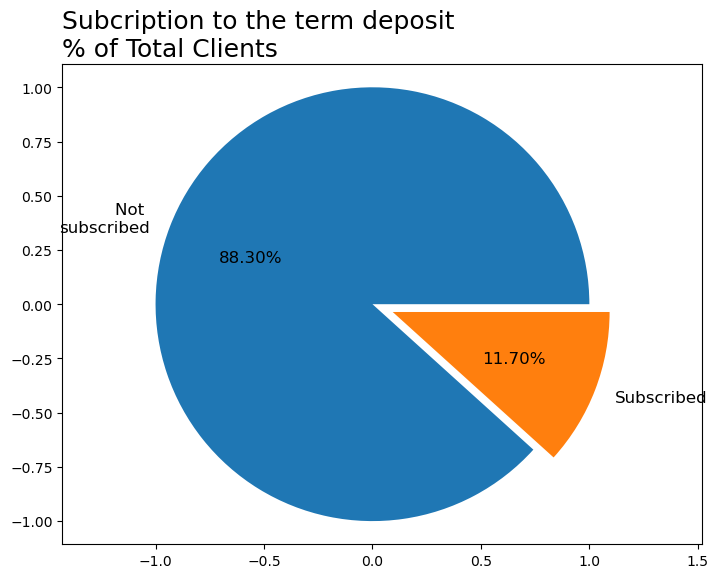

In [12]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1) # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.pie(bank['y'].value_counts(),
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12))

ax.axis('equal')
plt.title('Subcription to the term deposit\n% of Total Clients',
loc='left',
color = 'black',
fontsize = '18')

plt.show()

In [15]:
# We will groupby then count
bank.groupby(['campaign'])['y'].count().reset_index().sort_values(by='y',ascending=False).iloc[:5]

,campaign,y
0,1,17544
1,2,12505
2,3,5521
3,4,3522
4,5,1764


# Who are the target audience ?,Which customers were more likely to subscribe to the term deposit?

Text(0, 0.5, 'Frequency of Purchase')

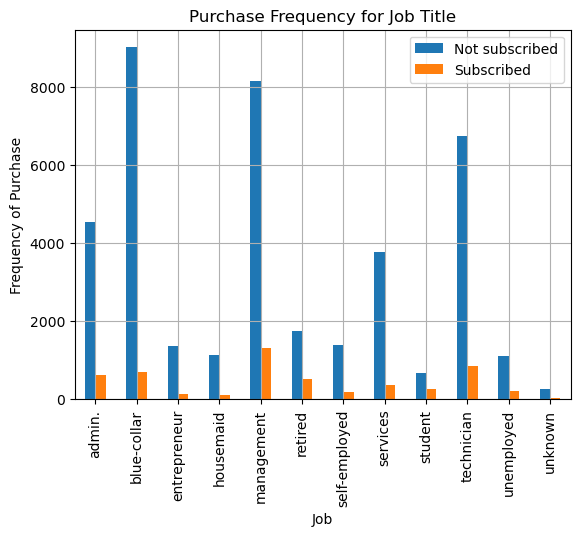

In [16]:
table = pd.crosstab(bank.job, bank.y)
table.columns = ['Not subscribed', 'Subscribed']
table.plot(kind='bar')

plt.grid(True)

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

In [17]:
table = pd.crosstab(bank.job, bank.y)
table = round(table.div(table.sum(axis=1), axis=0).mul(100), 2)
table.columns=['notsubcribed', 'subcribed']
table.sort_values(by=['subcribed'], ascending=False).loc[:, 'subcribed']

job
student          28.68
retired          22.79
unemployed       15.50
management       13.76
admin.           12.20
self-employed    11.84
unknown          11.81
technician       11.06
services          8.88
housemaid         8.79
entrepreneur      8.27
blue-collar       7.27
Name: subcribed, dtype: float64

The target customers are admins, blue-collars and techinicians but the frequency of students and
retired people subscribed to the term deposit are pretty high (28.68% for students and 22.79% for
retired people).

# Role of marital status in subscription behaviour

Text(0, 0.5, 'Proportion of Customers')

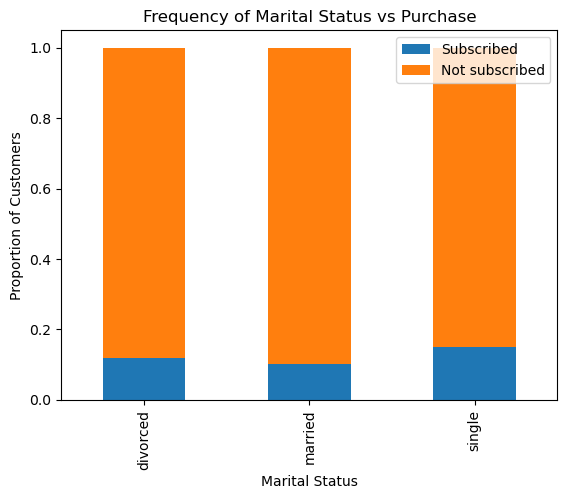

In [18]:
table = pd.crosstab(bank.marital,bank.y)
table = table.div(table.sum(1).astype(float), axis=0)
table.columns = ['Not subscribed', 'Subscribed']
# Ordering stacked bars and plot the chart
table[['Subscribed', 'Not subscribed']].plot(kind='bar', stacked=True)
plt.title('Frequency of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

<AxesSubplot:xlabel='marital'>

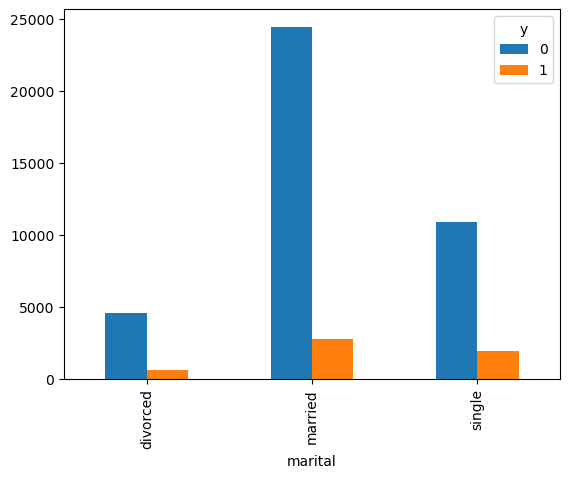

In [19]:
pd.crosstab(bank.marital,bank.y).plot(kind="bar")

# Feature deletion

In [22]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [23]:
bank=bank.drop(["duration"],axis=1)

In [24]:
bank.shape

(45211, 16)

In [25]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [26]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [27]:
 # Create a list of features to dummy
todummy_list = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome']


In [28]:
# Function to dummy all the categorical variables used for modeling
# prefix : string, list of strings, or dict of strings, default None
# String to append DataFrame column names.
# dummy_na : bool, default False
# Add a column to indicate NaNs, if False NaNs are ignored.
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False) # prefix give name
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [29]:
X= dummy_df(bank, todummy_list)
print(X.shape)

(45211, 51)


In [31]:
X

,age,balance,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,1,-1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,3,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,2,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,5,184,3,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,4,-1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [40]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [41]:
Y=bank.y

In [42]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

In [45]:
x_train.shape

(36168, 51)

In [46]:
y_train.shape

(36168,)

In [47]:
x_test.shape

(9043, 51)

In [48]:
x_test

,age,balance,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
10297,0.259740,0.072803,0.366667,0.016129,0.000000,0.000000,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31129,0.532468,0.082309,0.566667,0.032258,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
40921,0.597403,0.085241,0.366667,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11558,0.298701,0.080756,0.600000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38668,0.246753,0.092051,0.466667,0.032258,0.201835,0.014545,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,0.493506,0.097906,0.400000,0.032258,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29015,0.545455,0.074764,0.033333,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11924,0.389610,0.072803,0.633333,0.032258,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24844,0.220779,0.120558,0.566667,0.000000,0.209862,0.007273,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
y_test.shape

(9043,)

In [50]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_test_pred=classifier.predict(x_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7908
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043



In [53]:
 # Imports
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm=confusion_matrix(y_test, y_test_pred)
print(cm)

[[7908    0]
 [   0 1135]]


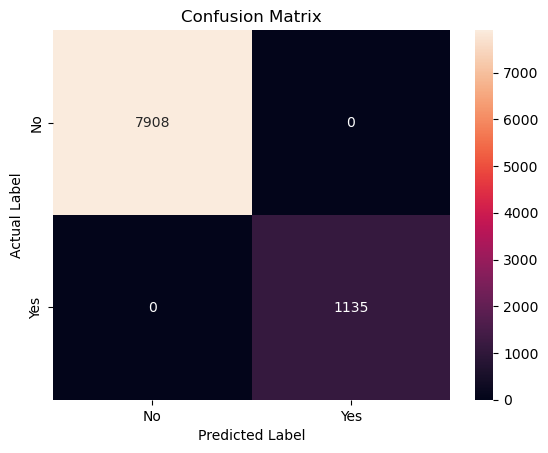

In [54]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
import matplotlib.pyplot as plt
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()